<a href="https://colab.research.google.com/github/danvasem/pytorch-ex/blob/master/Clase_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch

from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

#Modelo pre-entrenado

In [13]:
inception = models.inception_v3(pretrained=True)


Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/checkpoints/inception_v3_google-1a9a5a14.pth


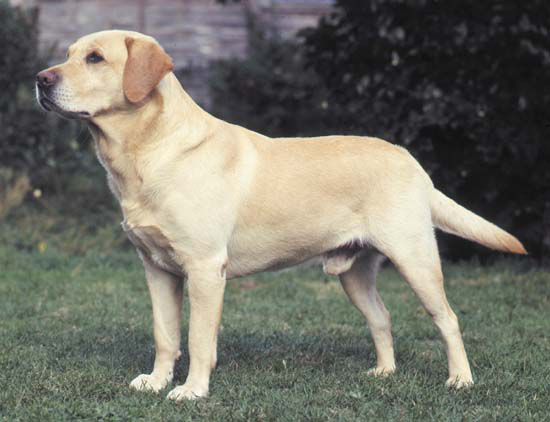

In [39]:
url='https://www.perrolabrador.net/wp-content/uploads/2015/03/labrador_pura_raza.jpg'
image=request.urlretrieve(url,'test.jpg')
img=Image.open(image[0])
img

In [43]:
preprocess=transforms.Compose([
     transforms.Resize(128),
     transforms.CenterCrop(128),
     transforms.ToTensor(),
     transforms.Normalize(
         mean=[0.485, 0.456, 0.406],
         std=[0.229, 0.224, 0.225]
     )                          
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


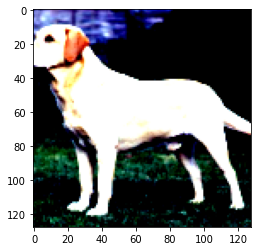

In [44]:
img_t=preprocess(img)
batch=torch.unsqueeze(img_t,0)
plt.imshow(img_t.permute(1,2,0))

In [25]:
inception.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [ ]:
out = inception(batch)
out

In [46]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [51]:
_,index=torch.max(out,1)

In [50]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('Labrador retriever', 68.57191467285156)

#Trabajando con un dataset

CIFAR 10 es un conjunto preexistente de datasets con imagenes de 3 bytes con dimensiones de 32 x 32 con el objetivo de utilizarlas para entrenar un modelo. EL dataset contiene tanto imagenes de entrenamiento como de Testing

In [52]:
data_path = 'data/'
dataset = datasets.CIFAR10(data_path, train=True, download=True)
validation_dataset = datasets.CIFAR10(data_path, train=False, download=True)

Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


In [53]:
classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

In [54]:
len(dataset)

50000

In [56]:
img, label = dataset[100]
img, label, classes[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F2AA5B19DA0>, 8, 'ship')

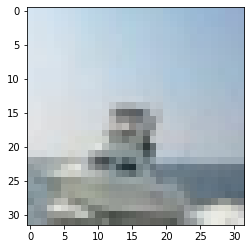

In [57]:
plt.imshow(img)

In [60]:
tensor_transform = transforms.ToTensor()
img_tensor= tensor_transform(img)
img, img_tensor, img_tensor.shape

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F2AA5B19DA0>,
 tensor([[[0.8353, 0.8275, 0.8275,  ..., 0.5922, 0.5922, 0.5843],
          [0.8392, 0.8314, 0.8314,  ..., 0.5961, 0.5961, 0.5922],
          [0.8471, 0.8392, 0.8353,  ..., 0.6000, 0.6000, 0.5922],
          ...,
          [0.5686, 0.5333, 0.5608,  ..., 0.8471, 0.7686, 0.7176],
          [0.5451, 0.5059, 0.5059,  ..., 0.8902, 0.8745, 0.8196],
          [0.5373, 0.5608, 0.5333,  ..., 0.8196, 0.8510, 0.8941]],
 
         [[0.8980, 0.8902, 0.8902,  ..., 0.6824, 0.6824, 0.6745],
          [0.8980, 0.8902, 0.8902,  ..., 0.6863, 0.6863, 0.6824],
          [0.8980, 0.8902, 0.8902,  ..., 0.6902, 0.6902, 0.6824],
          ...,
          [0.6235, 0.5804, 0.5961,  ..., 0.8510, 0.7725, 0.7176],
          [0.6000, 0.5569, 0.5451,  ..., 0.8941, 0.8784, 0.8196],
          [0.5961, 0.6078, 0.5686,  ..., 0.8196, 0.8510, 0.8941]],
 
         [[0.9490, 0.9412, 0.9412,  ..., 0.8078, 0.8078, 0.8000],
          [0.9451, 0.9373, 0.9373,  ..., 0

In [61]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [62]:
img, label = dataset[100]
img, label, classes[label]

(tensor([[[0.8353, 0.8275, 0.8275,  ..., 0.5922, 0.5922, 0.5843],
          [0.8392, 0.8314, 0.8314,  ..., 0.5961, 0.5961, 0.5922],
          [0.8471, 0.8392, 0.8353,  ..., 0.6000, 0.6000, 0.5922],
          ...,
          [0.5686, 0.5333, 0.5608,  ..., 0.8471, 0.7686, 0.7176],
          [0.5451, 0.5059, 0.5059,  ..., 0.8902, 0.8745, 0.8196],
          [0.5373, 0.5608, 0.5333,  ..., 0.8196, 0.8510, 0.8941]],
 
         [[0.8980, 0.8902, 0.8902,  ..., 0.6824, 0.6824, 0.6745],
          [0.8980, 0.8902, 0.8902,  ..., 0.6863, 0.6863, 0.6824],
          [0.8980, 0.8902, 0.8902,  ..., 0.6902, 0.6902, 0.6824],
          ...,
          [0.6235, 0.5804, 0.5961,  ..., 0.8510, 0.7725, 0.7176],
          [0.6000, 0.5569, 0.5451,  ..., 0.8941, 0.8784, 0.8196],
          [0.5961, 0.6078, 0.5686,  ..., 0.8196, 0.8510, 0.8941]],
 
         [[0.9490, 0.9412, 0.9412,  ..., 0.8078, 0.8078, 0.8000],
          [0.9451, 0.9373, 0.9373,  ..., 0.8118, 0.8118, 0.8039],
          [0.9373, 0.9294, 0.9294,  ...,

In [63]:
img.min(), img.max()

(tensor(0.1176), tensor(0.9490))

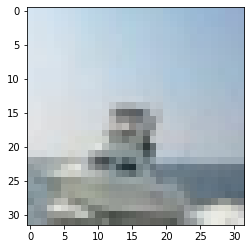

In [64]:
plt.imshow(img.permute(1,2,0))

In [65]:
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3)

In [66]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [67]:
imgs.view(3,-1).mean(dim=1)

tensor([0.4915, 0.4823, 0.4468])

In [68]:
imgs.view(3,-1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [69]:
transform = transforms.Compose(
              [transforms.ToTensor(),
               transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
              ])

In [70]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'frog'

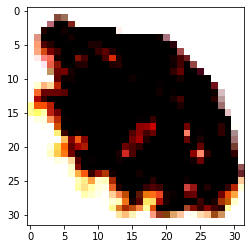

In [71]:
img_transformed,label = dataset[125]

plt.imshow(img_transformed.permute(1, 2, 0))
classes[label]